In [1]:
import pandas as pd
import numpy as np
import csv
import os
from scipy import stats
import pyphysio as ph
from pdb import set_trace
import random
from datetime import timedelta, datetime
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Please cite:
Bizzego et al. (2019) 'pyphysio: A physiological signal processing library for data science approaches in physiology', SoftwareX


In [2]:
#survey windows 
#these are available in the 10 Minute Windows subfolder
surv = pd.read_csv('C:/Users/Luis/Box/R15 Sensor Preprocessing and Analysis/10 Minute Windows/PR023/PR023 Survey Windows MERGED.csv',parse_dates=['timestamp'], infer_datetime_format=True, index_col=[0])
surv['timestamp'] = pd.to_datetime(surv['timestamp'], format='mixed') #pandas deprecated the infer_datetime_format argument for read_csv, this is our workaround

#baseline windows
#also available in the 10 Minute Windows subfolder
base = pd.read_csv('C:/Users/Luis/Box/R15 Sensor Preprocessing and Analysis/10 Minute Windows/PR023/PR023 Baseline MERGED.csv',parse_dates=['timestamp'], infer_datetime_format=True, index_col=[0])

#ema responses
#found in Sofie Data subfolder, may have to dig for it 
ema = pd.read_csv("C:/Users/Luis/Box/R15 Sensor Preprocessing and Analysis/Data/Sofie Data/PR/Maintained active dx/PR023/PR023_rawwithtime2022-07-01.csv", parse_dates=['ethica_time_utc'], infer_datetime_format=True, index_col=[0])
ema['ethica_time_utc'] = pd.to_datetime(ema['ethica_time_utc']) #same workaround


<ipython-input-2-cc24edca1ac2>:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  surv = pd.read_csv('C:/Users/Luis/Box/R15 Sensor Preprocessing and Analysis/10 Minute Windows/PR023/PR023 Survey Windows MERGED.csv',parse_dates=['timestamp'], infer_datetime_format=True, index_col=[0])
<ipython-input-2-cc24edca1ac2>:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  base = pd.read_csv('C:/Users/Luis/Box/R15 Sensor Preprocessing and Analysis/10 Minute Windows/PR023/PR023 Baseline MERGED.csv',parse_dates=['timestamp'], infer_datetime_format=True, index_col=[0]

In [3]:
#surv
surv2 = surv.groupby(['event']).apply(min)
with pd.option_context('display.max_rows', None,):
    print(surv2['timestamp'])



event
0    2021-01-31 18:02:00.000
3    2021-01-30 14:42:00.000
4    2021-01-29 23:15:00.000
5    2021-01-29 21:47:00.000
6    2021-01-29 16:59:00.000
13   2021-01-26 19:33:00.000
14   2021-01-26 16:04:00.000
15   2021-01-25 21:26:00.000
23   2021-01-23 02:24:00.000
24   2021-01-22 20:43:00.000
25   2021-01-22 18:59:00.000
34   2021-01-19 21:44:15.250
35   2021-01-19 18:55:00.000
36   2021-01-19 14:48:00.000
41   2021-01-17 23:18:00.000
42   2021-01-17 22:18:00.000
43   2021-01-17 17:50:00.000
44   2021-01-17 14:35:00.000
45   2021-01-17 02:56:00.000
46   2021-01-16 21:04:00.000
47   2021-01-16 18:31:00.000
48   2021-01-16 16:27:00.000
61   2021-01-12 17:49:00.000
62   2021-01-12 16:44:00.000
63   2021-01-12 01:37:00.000
64   2021-01-11 21:21:00.000
65   2021-01-11 19:01:00.000
66   2021-01-11 16:22:00.000
80   2021-01-07 02:49:00.000
81   2021-01-06 20:52:00.000
82   2021-01-06 17:18:00.000
83   2021-01-06 16:16:00.000
84   2021-01-06 00:52:00.000
85   2021-01-05 20:49:00.000
86   202

In [4]:
with pd.option_context('display.max_rows', None,):
    print(ema['ethica_time_utc'])


ID
PR023   2021-01-01 15:37:08
PR023   2021-01-01 17:33:00
PR023   2021-01-01 21:32:41
PR023   2021-01-02 01:18:30
PR023   2021-01-02 16:20:43
PR023   2021-01-02 17:51:33
PR023   2021-01-02 22:14:16
PR023   2021-01-03 02:04:41
PR023   2021-01-03 15:30:37
PR023   2021-01-03 17:00:37
PR023   2021-01-03 22:16:24
PR023   2021-01-04 00:44:32
PR023   2021-01-04 16:34:03
PR023   2021-01-04 18:33:51
PR023   2021-01-04 21:18:16
PR023   2021-01-05 01:21:30
PR023   2021-01-05 15:19:36
PR023   2021-01-05 19:33:13
PR023   2021-01-05 21:02:28
PR023   2021-01-06 01:09:10
PR023   2021-01-06 16:29:39
PR023   2021-01-06 17:37:23
PR023   2021-01-06 21:05:28
PR023   2021-01-07 03:05:36
PR023   2021-01-07 16:25:47
PR023   2021-01-07 18:40:33
PR023   2021-01-07 23:04:05
PR023   2021-01-08 00:17:27
PR023   2021-01-08 15:20:53
PR023   2021-01-08 18:33:00
PR023   2021-01-08 21:12:14
PR023   2021-01-09 03:30:22
PR023   2021-01-09 15:11:29
PR023   2021-01-09 19:48:06
PR023   2021-01-09 22:53:39
PR023   2021-01-0

In [5]:
### these scripts are taken from prior scripts written by collaborators with some modification by me
### these are all the functions we need... i think

#Preprocessing filters that will be applied to raw data samples
def exp_moving_average(signal, w):
    """Expoential moving average filter from pandas"""
    return pd.Series(signal.ewm(span=w, adjust=True).mean(), signal.index)

def filt_EDA(df_data):
    """Apply filter to EDA signal using processing steps from Pyphysio.
    
    Parameters
    ----------
    df_data : pandas.DataFrame
        DataFrame with EDA time and signal data
    
    Returns
    -------
    pandas.DataFrame 
        Updated DataFrame with Tonic and Phasic signals
    
    """
    
    # Set up Pyphysio EvenlySignal object
    eda_data = ph.EvenlySignal(values = df_data['EDA'].to_numpy(), sampling_freq = 4, signal_type='EDA')
    
    # Apply IIR filter
    eda_data = ph.IIRFilter(fp=0.8, fs=1.1, ftype='ellip')(eda_data)
    driver = ph.DriverEstim()(eda_data)
    
    # Estimate Tonic and Phasic signals
    phasic, tonic, _ = ph.PhasicEstim(delta=0.02)(driver)
    
    # Adjust signal length to match length of original EDA signal
    if len(phasic) != len(eda_data.get_values()):
        phasic = np.append(phasic.get_values(), phasic[-1])
        tonic = np.append(tonic.get_values(), tonic[-1])    
    
    # Append signal data to DataFrame
    df_data.loc[:,'Tonic'] = tonic
    df_data.loc[:,'Phasic'] = phasic
    return df_data  

def filt_TEMP(df_data):
    """Apply filter to TEMP signal using predetermined values"""
    df_data['TEMP_Filtered'] = exp_moving_average(df_data['TEMP'],60)
    return df_data

def filter_signals(df_data):
    """Apply filters/processing to respective signals.
    
    This function is intended to be used in conjunction with the
    pandas.DataFrame.apply() method, which passes a column of a DataFrame at
    a time.
    
    Parameters
    ----------
    df_data : pandas.Series
        A Series of DataFrames which contain all the signals for a single
        session.
    
    Returns
    -------
    pandas.Series
        Updated Series of DataFrames containing filtered/processed signal
        data
        
    Notes
    -----
    No filtering/processing for ACC, HR, and IBI signals is implemented,
    but is commented out for implementation in the future.
    
    """
    
    #df_data.loc['BVP'].loc[:,'BVP'] = filt_BVP(df_data.loc['BVP'])
    df_data = filt_EDA(df_data)
    df_data = filt_TEMP(df_data)
    
    return df_data


#RMS calculation Helper Function
def rms(data):
    return np.sqrt(np.mean(data ** 2))

#pandas deprecated the MAD function, so i went on stackoverflow and found a new one

def what_is_mad(list_of_nums):
    count = len(list_of_nums)
    mean = sum(list_of_nums) / count
    mad = sum((abs(num - mean) for num in list_of_nums)) / count
    return mad

#Every other feature is easy to calculate using Python built-ins
def feature_extract(df_data):
    result = {}
    result['Time'] = df_data.loc[:,'timestamp'].min()
    #for featbase in ['HR','EDA','TEMP','Tonic','Phasic','TEMP_Filtered']:
    for featbase in ['HR','EDA','TEMP', 'meanCenteredEDA', 'meanCenteredHR', 'meanCenteredTEMP']:
        #set_trace()
        result[featbase + '_Mean'] = df_data.loc[:,featbase].mean()
        result[featbase + '_Minimum'] = df_data.loc[:,featbase].min()
        result[featbase + '_Maximum'] = df_data.loc[:,featbase].max()
        result[featbase + '_Stdev'] = df_data.loc[:,featbase].std()
        result[featbase + '_RMS'] = rms(df_data.loc[:,featbase])
        result[featbase + '_MAD'] = what_is_mad(df_data.loc[:,featbase])
        result[featbase + '_MAV'] = df_data.loc[:,featbase].abs().max()
        result[featbase + '_Median'] = df_data.loc[:,featbase].median()
        result[featbase + '_P25'] = df_data.loc[:,featbase].quantile(0.25)
        result[featbase + '_P75'] = df_data.loc[:,featbase].quantile(0.75)
    return pd.Series(result, dtype='object')


#simplified the feature extraction function to only grab mean and median
def average_calc(df_data):
    result = {}    
    result['EDA_Mean'] = df_data.loc[:,'EDA'].mean()
    result['EDA_Median'] = df_data.loc[:,'EDA'].median()
    result['HR_Mean'] = df_data.loc[:,'HR'].mean()
    result['HR_Median'] = df_data.loc[:,'HR'].median()
    result['TEMP_Mean'] = df_data.loc[:,'TEMP'].mean()
    result['TEMP_Median'] = df_data.loc[:,'TEMP'].median()

    return pd.Series(result, dtype='object')

#creating a function to match rows
#remember that the physio timestamp must ALWAYS BE BEFORE the EMA timestamp

def windowMatch(features,surveys): 
    matchlist = []
    for index, frow in features.iterrows():
        physiotime = frow['Time']
        for index, srow in surveys.iterrows():
            ematime = srow['ethica_time_utc']
            #df3 = physiotime - ematime #physiotime and ematime can only be within 1 hour of each other - choose which one you're using here based on whichever gives you more matches, for some reason trying to use the absolute value breaks the code
            df3 = ematime - physiotime
            if df3 < delta and df3 > zeropoint:
                print("Physio time (", physiotime, ") and EMA time (", ematime, ") difference is", df3)
                matchlist.append(pd.concat([frow,srow],axis=0))
    return pd.DataFrame(matchlist)

In [6]:
#this chunk of code will normalize our date (deducting the average/median of the baseline windows from each datapoint in survey windows)

baseline_values = base.groupby(['code']).apply(average_calc) # calculating averages of the baseline

#creating variables to subtract from the dataframe columns
edamean = baseline_values.at[0,"EDA_Mean"]
edamed = baseline_values.at[0,"EDA_Median"]
hrmean = baseline_values.at[0,"HR_Mean"]
hrmed = baseline_values.at[0,"HR_Median"]
tempmean = baseline_values.at[0,"TEMP_Mean"]
tempmed = baseline_values.at[0,"TEMP_Median"]

#subtracting our means/medians from each value in the participant's data - excluding ACC 
surv['meanCenteredEDA'] = surv['EDA'] - edamean
surv['medianCenteredEDA'] = surv['EDA'] - edamed
surv['meanCenteredHR'] = surv['HR'] - hrmean
surv['medianCenteredHR'] = surv['HR'] - hrmed
surv['meanCenteredTEMP'] = surv['TEMP'] - tempmean
surv['medianCenteredTEMP'] = surv['TEMP'] - tempmed

surv.head()

,timestamp,HR,X,Y,Z,TEMP,BVP,EDA,event,meanCenteredEDA,medianCenteredEDA,meanCenteredHR,medianCenteredHR,meanCenteredTEMP,medianCenteredTEMP
timer,,,,,,,,,,,,,,,
0.25,2021-01-03 22:03:00.000,83.67,-54.0,-37.0,3.0,32.25,-227.63,0.016648,92,-0.061659,-0.064081,7.737334,10.79,-2.125801,-2.58
0.50,2021-01-03 22:03:00.250,83.80,-46.0,-40.0,1.0,32.25,-50.50,0.017929,92,-0.060378,-0.062800,7.867334,10.92,-2.125801,-2.58
0.75,2021-01-03 22:03:00.500,83.80,-50.0,-40.0,-3.0,32.25,-63.85,0.015368,92,-0.062939,-0.065361,7.867334,10.92,-2.125801,-2.58
1.00,2021-01-03 22:03:00.750,83.80,-51.0,-39.0,-2.0,32.25,-36.97,0.016648,92,-0.061659,-0.064081,7.867334,10.92,-2.125801,-2.58
1.25,2021-01-03 22:03:01.000,83.80,-52.0,-38.0,-3.0,32.25,3.98,0.015368,92,-0.062939,-0.065361,7.867334,10.92,-2.125801,-2.58


In [7]:
#this chunk is to prepare the physio data to be matched to timestamps 

physio = surv.sort_values(['timestamp'], ignore_index=True) #sort by timestamp
physio = physio.groupby(['event']).apply(feature_extract) #applying feature extraction to create summary features

#setting up a timedelta to base our window matching off of
#a survey window can never occur more than an hour from when a survey was completed, so our delta is 1 hour
#if a window is more than an hour separate from survey completion, it cannot be matched
#however, the survey window timestamp should ALWAYS precede the survey completion time
delta = timedelta(hours = 1)
zeropoint = timedelta(seconds = 1)

#now we apply the window matching function - it calculates the time differences of each timestamp
#if the time difference is less than 10 minutes, 
mydf = windowMatch(physio, ema)
for index,row in mydf.iterrows():
    print (abs(row['ethica_time_utc']-row['Time']))
    
mydf.head()

Physio time ( 2021-01-31 18:02:00 ) and EMA time ( 2021-01-31 18:20:42 ) difference is 0 days 00:18:42
Physio time ( 2021-01-30 14:42:00 ) and EMA time ( 2021-01-30 14:55:18 ) difference is 0 days 00:13:18
Physio time ( 2021-01-29 23:15:00 ) and EMA time ( 2021-01-29 23:34:51 ) difference is 0 days 00:19:51
Physio time ( 2021-01-29 21:47:00 ) and EMA time ( 2021-01-29 22:00:37 ) difference is 0 days 00:13:37
Physio time ( 2021-01-29 16:59:00 ) and EMA time ( 2021-01-29 17:12:16 ) difference is 0 days 00:13:16
Physio time ( 2021-01-26 19:33:00 ) and EMA time ( 2021-01-26 19:43:14 ) difference is 0 days 00:10:14
Physio time ( 2021-01-26 19:33:00 ) and EMA time ( 2021-01-26 19:46:21 ) difference is 0 days 00:13:21
Physio time ( 2021-01-26 16:04:00 ) and EMA time ( 2021-01-26 16:17:30 ) difference is 0 days 00:13:30
Physio time ( 2021-01-25 21:26:00 ) and EMA time ( 2021-01-25 21:49:29 ) difference is 0 days 00:23:29
Physio time ( 2021-01-23 02:24:00 ) and EMA time ( 2021-01-23 02:42:11 ) 

,Time,HR_Mean,HR_Minimum,HR_Maximum,HR_Stdev,HR_RMS,HR_MAD,HR_MAV,HR_Median,HR_P25,...,heartrace,physsens_eat,attn_others,worryoverwhelm,physsens,socialanx,sens_body,ridthoughts,memories,chewspit
0,2021-01-31 18:02:00,92.951544,73.42,146.43,18.632728,94.799911,12.724978,146.43,87.58,81.70,...,19.0,41.0,1.0,2.0,38.0,6.0,49.0,0.0,0.0,0.0
1,2021-01-30 14:42:00,84.194823,73.02,112.47,10.522856,84.849588,8.539682,112.47,80.13,76.35,...,6.0,19.0,0.0,5.0,7.0,0.0,45.0,0.0,0.0,0.0
2,2021-01-29 23:15:00,98.937905,75.42,139.68,22.034476,101.360865,20.130651,139.68,92.12,77.83,...,0.0,0.0,29.0,27.0,13.0,6.0,31.0,0.0,0.0,0.0
3,2021-01-29 21:47:00,87.896576,72.92,138.67,16.250072,89.385474,11.787614,138.67,81.08,77.27,...,0.0,1.0,0.0,14.0,21.0,24.0,12.0,0.0,8.0,0.0
4,2021-01-29 16:59:00,79.993998,66.08,90.23,6.524740,80.259543,5.057698,90.23,81.30,76.97,...,3.0,19.0,8.0,24.0,26.0,17.0,30.0,0.0,0.0,0.0


In [10]:
#putting together physio featureset to be ready for correlations
featbase =['HR','EDA','TEMP', 'meanCenteredEDA', 'meanCenteredHR', 'meanCenteredTEMP']
featstat =['_Mean','_Minimum','_Stdev','_RMS','_MAD','_MAV','_Median','_P25','_P75']
physio_feats = {}
allfeats = []
for fb in featbase:
    curfeats=[]
    for fs in featstat:
        curfeats.append(fb+fs)
        allfeats.append(fb+fs)
    physio_feats[fb] = mydf[curfeats]
physio_feats['All'] = mydf[allfeats]
        

In [11]:
#cleaning up EMA dataset for correlations
excl_list = ['ethica_time','lag','tdif','cumsumT','ethica_time_utc','dayvar','beepvar','beepconsec']
surfeat=[ele for ele in list(ema.columns) if ele not in excl_list]
ema_feats = mydf[surfeat]

In [13]:
#centering EMA just in case - just hashtag out this loop if it's not necessary

for col in ema_feats:
    ema_feats[col + '_meanCentered'] = ema_feats[col] - ema_feats.loc[:,col].mean()
    ema_feats[col + '_medCentered'] = ema_feats[col] - ema_feats.loc[:,col].median()
    
    
pd.set_option('display.max_columns', None)
ema_feats

<ipython-input-13-6393ea3e0ce2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ema_feats[col + '_meanCentered'] = ema_feats[col] - ema_feats.loc[:,col].mean()
<ipython-input-13-6393ea3e0ce2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ema_feats[col + '_medCentered'] = ema_feats[col] - ema_feats.loc[:,col].median()
<ipython-input-13-6393ea3e0ce2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,sleep,fowg,wtshdiss,badperson,eat_public,eat_worry,anxiety,worthless,restrict,desirethin,overvalwtsh,reject,mistakes,highstand,iuc,saa,intrus_thought,fearloc,bodydiss,ineffective,food_intrus,guilty,shame,sad,si,thought_death,scared,feelfat,tired,agitated,relax,urge_restrict,stress,skipmeal,foodrules,vomit,laxdiur,binge,bodycheck,impulse,exercise,compulsion,avoid_food,selfharm,hunger_anx,smallportion,drink_public,avoid_emo,avoid_sit,emo_overwhelm,eat_anx,rumination,heartrace,physsens_eat,attn_others,worryoverwhelm,physsens,socialanx,sens_body,ridthoughts,memories,chewspit,sleep_meanCentered,sleep_medCentered,fowg_meanCentered,fowg_medCentered,wtshdiss_meanCentered,wtshdiss_medCentered,badperson_meanCentered,badperson_medCentered,eat_public_meanCentered,eat_public_medCentered,eat_worry_meanCentered,eat_worry_medCentered,anxiety_meanCentered,anxiety_medCentered,worthless_meanCentered,worthless_medCentered,restrict_meanCentered,restrict_medCentered,desirethin_meanCentered,desirethin_medCentered,overvalwtsh_meanCentered,overvalwtsh_medCentered,reject_meanCentered,reject_medCentered,mistakes_meanCentered,mistakes_medCentered,highstand_meanCentered,highstand_medCentered,iuc_meanCentered,iuc_medCentered,saa_meanCentered,saa_medCentered,intrus_thought_meanCentered,intrus_thought_medCentered,fearloc_meanCentered,fearloc_medCentered,bodydiss_meanCentered,bodydiss_medCentered,ineffective_meanCentered,ineffective_medCentered,food_intrus_meanCentered,food_intrus_medCentered,guilty_meanCentered,guilty_medCentered,shame_meanCentered,shame_medCentered,sad_meanCentered,sad_medCentered,si_meanCentered,si_medCentered,thought_death_meanCentered,thought_death_medCentered,scared_meanCentered,scared_medCentered,feelfat_meanCentered,feelfat_medCentered,tired_meanCentered,tired_medCentered,agitated_meanCentered,agitated_medCentered,relax_meanCentered,relax_medCentered,urge_restrict_meanCentered,urge_restrict_medCentered,stress_meanCentered,stress_medCentered,skipmeal_meanCentered,skipmeal_medCentered,foodrules_meanCentered,foodrules_medCentered,vomit_meanCentered,vomit_medCentered,laxdiur_meanCentered,laxdiur_medCentered,binge_meanCentered,binge_medCentered,bodycheck_meanCentered,bodycheck_medCentered,impulse_meanCentered,impulse_medCentered,exercise_meanCentered,exercise_medCentered,compulsion_meanCentered,compulsion_medCentered,avoid_food_meanCentered,avoid_food_medCentered,selfharm_meanCentered,selfharm_medCentered,hunger_anx_meanCentered,hunger_anx_medCentered,smallportion_meanCentered,smallportion_medCentered,drink_public_meanCentered,drink_public_medCentered,avoid_emo_meanCentered,avoid_emo_medCentered,avoid_sit_meanCentered,avoid_sit_medCentered,emo_overwhelm_meanCentered,emo_overwhelm_medCentered,eat_anx_meanCentered,eat_anx_medCentered,rumination_meanCentered,rumination_medCentered,heartrace_meanCentered,heartrace_medCentered,physsens_eat_meanCentered,physsens_eat_medCentered,attn_others_meanCentered,attn_others_medCentered,worryoverwhelm_meanCentered,worryoverwhelm_medCentered,physsens_meanCentered,physsens_medCentered,socialanx_meanCentered,socialanx_medCentered,sens_body_meanCentered,sens_body_medCentered,ridthoughts_meanCentered,ridthoughts_medCentered,memories_meanCentered,memories_medCentered,chewspit_meanCentered,chewspit_medCentered
0,42.0,9.0,18.0,20.0,2.0,1.0,17.0,10.0,0.0,17.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,33.0,32.0,46.0,24.0,31.0,2.0,0.0,0.0,0.0,23.0,27.0,32.0,24.0,37.0,12.0,20.0,20.0,68.0,0.0,61.0,35.0,0.0,21.0,0.0,22.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,19.0,41.0,1.0,2.0,38.0,6.0,49.0,0.0,0.0,0.0,-1.125,3.0,-8.657895,-9.0,-3.078947,-1.0,3.5,8.5,-1.342105,2.0,-35.394737,-30.0,0.868421,3.5,-1.105263,5.0,-48.684211,-59.5,-13.973684,-10.0,9.0,11.5,-0.921053,0.0,-9.473684,0.0,-1.815789,0.0,-2.947368,0.0,-2.026316,0.0,-2.184211,0.0,-14.605263,-14.0,13.578947,16.5,-3.5,0.5,-6.736842,-15.5,1.394737,2.5,14.052632,14.5,-5.315789,0.5,0.0,0.0,-2.421053,0.0,-0.131579,0.0,5.894737,10.0,-24.921053,-22.5,13.394737,19.0,-6.078947,0.0,-10.

In [14]:
#now we're correlating physio with EMA here
corrdict = {}
for sur in surfeat:
    corrdict[sur]=physio_feats['All'].corrwith(ema_feats[sur],method='pearson')
    corrdict[sur]=physio_feats['All'].corrwith(ema_feats[sur],method='pearson')
corr_df = pd.DataFrame(corrdict)
                                                     
corr_df

,sleep,fowg,wtshdiss,badperson,eat_public,eat_worry,anxiety,worthless,restrict,desirethin,overvalwtsh,reject,mistakes,highstand,iuc,saa,intrus_thought,fearloc,bodydiss,ineffective,food_intrus,guilty,shame,sad,si,thought_death,scared,feelfat,tired,agitated,relax,urge_restrict,stress,skipmeal,foodrules,vomit,laxdiur,binge,bodycheck,impulse,exercise,compulsion,avoid_food,selfharm,hunger_anx,smallportion,drink_public,avoid_emo,avoid_sit,emo_overwhelm,eat_anx,rumination,heartrace,physsens_eat,attn_others,worryoverwhelm,physsens,socialanx,sens_body,ridthoughts,memories,chewspit
HR_Mean,0.245376,-0.114839,-0.200649,-0.078989,0.160918,-0.123613,0.199893,-0.059475,-0.176562,-0.229335,0.010550,0.025051,-0.338614,-0.224420,0.079725,0.084983,-0.045215,-0.105134,0.085084,-0.025634,0.051492,-0.107491,-0.043697,-0.092438,NaN,-0.079002,0.210201,-0.067260,-0.090078,0.181511,0.217331,-0.246073,0.085201,-0.207307,-0.211824,0.350982,NaN,0.384758,0.043936,0.398029,-0.015806,0.213845,-0.258007,NaN,-0.230553,-0.181581,-0.064436,-0.155840,-0.081782,0.050265,-0.100059,0.157361,0.128494,0.202170,0.140152,0.041578,0.116757,0.008811,0.338690,0.067422,0.028626,-0.066433
HR_Minimum,0.234601,0.004367,-0.254679,-0.028175,-0.003020,-0.087520,0.048264,-0.082977,-0.173685,0.001345,-0.077226,0.027396,-0.262575,0.082370,-0.069242,-0.014555,-0.046877,-0.025913,0.030313,-0.129592,-0.067272,-0.006110,0.054619,-0.033397,NaN,-0.162368,0.034176,0.008351,-0.026189,-0.084924,-0.027992,-0.258624,-0.237062,-0.122666,-0.146386,0.223835,NaN,0.237340,0.166251,0.075669,-0.084414,0.144832,0.008226,NaN,-0.192558,-0.034075,-0.127575,-0.342369,-0.167853,0.072504,-0.091285,0.008123,0.134183,0.098045,-0.040353,-0.109783,0.054865,-0.021100,0.332005,0.045572,0.059831,-0.028808
HR_Stdev,0.059628,-0.208467,0.003008,0.034238,0.278386,0.028717,0.241589,0.101964,0.081219,-0.244684,0.128085,0.043048,-0.085617,-0.368279,0.034739,0.201529,0.093885,0.005556,-0.003694,0.106537,0.192242,-0.060424,0.047591,0.085778,NaN,0.154765,0.234771,-0.111844,-0.047811,0.296346,0.300758,0.116699,0.385185,-0.132618,0.084365,-0.060466,NaN,-0.023035,-0.225294,0.177475,-0.039285,0.060820,-0.107235,NaN,0.192744,-0.024791,0.023572,0.223114,-0.033554,-0.086105,-0.016123,0.087014,-0.033308,0.055175,0.281870,0.188904,0.070260,0.131000,0.021679,0.056998,0.147856,0.000738
HR_RMS,0.233910,-0.124774,-0.188444,-0.073169,0.177594,-0.117302,0.212454,-0.051069,-0.156932,-0.236981,0.022569,0.024964,-0.330904,-0.244966,0.074001,0.098725,-0.032914,-0.102533,0.077673,-0.018303,0.065833,-0.108915,-0.041135,-0.082694,NaN,-0.062071,0.226254,-0.072208,-0.093912,0.197270,0.231572,-0.221058,0.120771,-0.206916,-0.189074,0.323159,NaN,0.358126,0.015343,0.389990,-0.014473,0.206532,-0.258358,NaN,-0.199633,-0.177178,-0.062527,-0.126122,-0.075682,0.037859,-0.097727,0.154958,0.112562,0.188078,0.156287,0.062427,0.114191,0.011954,0.318633,0.070680,0.038815,-0.064324
HR_MAD,0.116788,-0.191956,-0.051320,0.001511,0.275436,0.007280,0.278529,0.072286,0.082610,-0.252107,0.101504,0.030557,-0.144578,-0.347948,0.033613,0.196788,0.072946,0.022090,-0.016553,0.125506,0.180332,-0.041123,0.012488,0.050780,NaN,0.165970,0.305965,-0.150921,-0.011923,0.299043,0.296518,0.071145,0.421961,-0.120372,0.070582,-0.061253,NaN,-0.024305,-0.217866,0.182651,-0.047505,0.085794,-0.121905,NaN,0.181273,-0.008416,0.024179,0.168621,-0.074634,-0.104152,-0.021716,0.065969,-0.028982,0.065843,0.299476,0.209235,0.056885,0.108552,0.060379,0.054822,0.100154,0.006364
HR_MAV,0.196216,-0.283516,-0.153176,0.113480,0.356177,0.055956,0.238378,0.194150,-0.040917,-0.230319,0.149259,0.096637,-0.154537,-0.351385,0.098822,0.261148,0.124204,0.024897,0.057621,0.144501,0.245640,0.003287,0.140016,0.147604,NaN,0.102407,0.112278,-0.000614,0.001404,0.294437,0.351428,-0.004330,0.176041,-0.230600,-0.048912,0.158971,NaN,0.197497,-0.021716,0.338264,-0.107220,0.116902,-0.073541,NaN,0.035206,-0.031596,0.002775,0.047449,-0.185911,-0.035102,-0.034095,0.113928,0.085017,0.247269,0.332356,0.012513,0.156387,0.279742

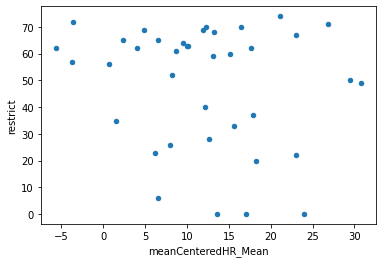

In [16]:
#just in case you want to do some scatterplots 
#you'll notice a lot of outliers in some of these plots - we may want to establish some way to remove outliers - perhaps if something is 4+ SDs from the mean?
ax1= mydf.plot.scatter(x='meanCenteredHR_Mean',y='restrict')

In [17]:
#/Users/sandoval/Library/CloudStorage/Box-Box/R15 Sensor Preprocessing and Analysis/JPCS Special Issue/normalizing.ipynb

#this will save the centered survey windows
surv.to_csv("""C:/Users/Luis/Box/R15 Sensor Preprocessing and Analysis/JPCS Special Issue/Normalized Data/PR023 Survey Windows CENTERED.csv""")

#this will save our correlation matrix 
corr_df.to_csv("""C:/Users/Luis/Box/R15 Sensor Preprocessing and Analysis/JPCS Special Issue/Correlation Matrices/PR023 Survey Correlations.csv""")

